In [4]:
import pandas as pd
import torch
import numpy as np

In [5]:
# Loss function: MSE
def loss_fn(target: torch.Tensor, network_output: torch.Tensor) -> torch.Tensor:
    return torch.mean(torch.square(target - network_output))

In [6]:
import sys
sys.path.append('..')

from utilities import linear_net

In [7]:
training_path = '../training_data/'
verification_path = '../verification_data/'
results_path = '../results/'
interpolating_for = 'exp'

# Interpolating experiment

1. Plot target function and $\mathcal{NN}$ once training has concluded.
2. Represent the training process to visualize convergence.

In [8]:
verification_data = pd.read_csv(f"{verification_path}/verification_{interpolating_for}_linspace_{1000}.csv")
xx = torch.tensor(verification_data['x'], dtype = torch.float32)[:, None]

In [23]:
n_inputs = [3, 5, 10, 15]
dimensions = [2, 3, 4, 5, 10, 15, 20]
learning_rates = [-1, -2, -3]

In [20]:
for dim in dimensions:
    print(f'dim: {dim}')
    for lr_exp in [-3]:
        print(f'lr {lr_exp}')
        for N in n_inputs:
            print(f'N {N}')
            # Load data
            input_data = pd.read_csv(f"{training_path}/input_{interpolating_for}_linspace_{N}.csv")
            x = torch.tensor(input_data['x'], dtype = torch.float32, requires_grad=False)[:, None]
            target = torch.tensor(input_data['y'], dtype = torch.float32, requires_grad=False)[:, None]

            for use_sigmoid in [True]:#[True, False]:
                # Get net
                NN = linear_net.Net(dim, torch.nn.Sigmoid()) if use_sigmoid \
                    else linear_net.Net(dim, torch.nn.ReLU(0.2))

                # Get optimizer
                optimizer = torch.optim.Adam(NN.parameters(), lr=1**lr_exp)

                # Training phase
                it_counter = 0
                while True:
                    optimizer.zero_grad()
                    loss = loss_fn(target, NN(x))
                    if loss < 1e-2:
                        network_output = np.reshape(NN(xx).detach().numpy(), newshape=-1)
                        net_type = 'sigmoid' if use_sigmoid else 'relu'
                        pd.DataFrame(data = { 'x': verification_data['x'], 
                                            'y_target': verification_data['y'], 
                                            'y_nn': network_output})\
                                    .to_csv(f'{results_path}/training_performance_{interpolating_for}_input{N}_{net_type}_lr{lr_exp}_dim{dim}.csv',
                                            index=False)
                        break
                    else:
                        loss.backward()
                        optimizer.step()
                        it_counter = it_counter + 1
                        print(loss.item())

dim: 2
lr -3
N 3
17.9123592376709
8.255497932434082
7.021765232086182
8.849396705627441
7.969490051269531
6.185941219329834
5.221919536590576
5.1309895515441895
5.18197774887085
4.916849136352539
4.291106700897217
3.426842451095581
2.5306568145751953
1.8316192626953125
1.4045242071151733
1.131675362586975
0.8856657147407532
0.6527162790298462
0.4648401439189911
0.35545387864112854
0.3619438111782074
0.43465813994407654
0.47626304626464844
0.5640653967857361
0.683281421661377
0.7524511218070984
0.7277334332466125
0.7416958808898926
0.6639518141746521
0.6075988411903381
0.5347713828086853
0.5121734142303467
0.4333517551422119
0.4868263900279999
0.4855055809020996
0.4971654415130615
0.554037868976593
0.5441613793373108
0.5202499628067017
0.520599901676178
0.49066832661628723
0.45144546031951904
0.44505059719085693
0.4428527355194092
0.43669643998146057
0.450065940618515
0.46215948462486267
0.4607274830341339
0.4622238576412201
0.457404762506485
0.4427189826965332
0.43306484818458557
0.428

N 5
19.545284271240234
7.9445600509643555
5.230140209197998
7.699189186096191
9.503921508789062
8.643983840942383
6.421272277832031
4.522080421447754
3.8594136238098145
4.241354942321777
4.8847880363464355
5.09829044342041
4.593249320983887
3.606797695159912
2.6282427310943604
2.0267415046691895
1.8363516330718994
1.7789421081542969
1.5551589727401733
1.145168662071228
1.005157232284546
1.364450216293335
1.0713212490081787
0.6847485303878784
0.7230228185653687
0.7813946008682251
0.5330725908279419
0.2817172408103943
0.3557191491127014
0.44157010316848755
0.3061409890651703
0.23708486557006836
0.38025742769241333
0.4526847004890442
0.3792993426322937
0.35453715920448303
0.4541243612766266
0.44569358229637146
0.34943804144859314
0.3610040545463562
0.3938977122306824
0.3296702802181244
0.28956684470176697
0.32692950963974
0.3234044909477234
0.28164583444595337
0.2883724272251129
0.3111385405063629
0.28389185667037964
0.2597939968109131
0.2696997821331024
0.2609233856201172
0.2295316010713

Evaluate accuracy of the algorithm according to dimensionality, learning rate and number of inputs:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create empty table
shape = (len(learning_rates), len(n_inputs), len(dimensions))
results = np.zeros(shape)

for l_index in range(len(learning_rates)):
    for n_index in range(len(n_inputs)):
        for d_index in range(len(dimensions)):
            n = n_inputs[n_index]
            d = dimensions[d_index]
            l = learning_rates[l_index]

            # Read csv file
            file_name = f"{results_path}training_performance_{interpolating_for}_input{n}_sigmoid_lr{l}_dim{d}.csv"
            df = pd.read_csv(file_name)

            # Do the computations we need
            subtraction = df['y_nn'] - df['y_target']
            size = len(subtraction)
            results[l_index, n_index, d_index] = ((subtraction ** 2).sum() / size) ** 0.5

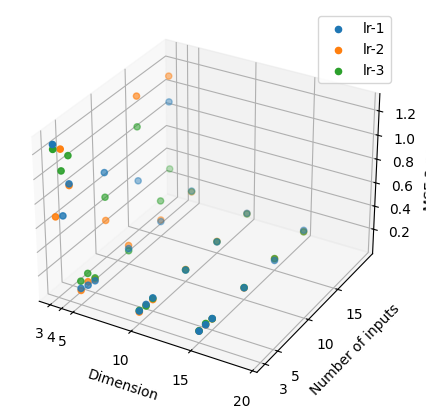

In [9]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(5,9))
ax = fig.add_subplot(111, projection='3d')

# Flatten the matrix into 1D arrays for x, y, and z
x = np.repeat(n_inputs, len(dimensions))
y = np.tile(dimensions, len(n_inputs))

# Create the scatter plot
for i in range(3):
    ax.scatter(x, y, results[i].flatten(), label=f'lr-{i+1}')

ax.set_xticks(dimensions)
ax.set_xlabel('Dimension')
ax.set_yticks(n_inputs)
ax.set_yticklabels(n_inputs)
ax.set_ylabel('Number of inputs')
ax.set_zlabel('MSE 2-norm')

ax.legend()

plt.show()

Plot accuracy and error:

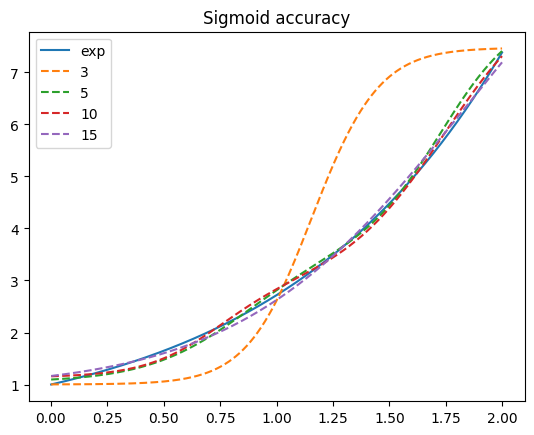

In [10]:
import matplotlib.pyplot as plt

plt.plot(verification_data['x'], verification_data['y'], label = 'exp')
file_path = f'training_performance_{interpolating_for}_input'
for N in n_inputs:
    df = pd.read_csv(f'{results_path}{file_path}{N}_sigmoid_lr-1_dim3.csv')
    plt.plot(df['x'], df['y_nn'], label = N, linestyle='--')
plt.legend()
plt.title('Sigmoid accuracy')
plt.show()

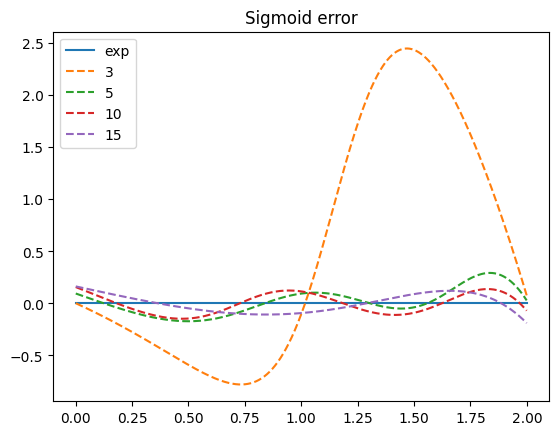

In [12]:
import matplotlib.pyplot as plt

plt.plot(verification_data['x'], 0 * verification_data['y'], label = 'exp')
file_path = f'training_performance_{interpolating_for}_input'
for N in n_inputs:
    df = pd.read_csv(f'{results_path}{file_path}{N}_sigmoid_lr-1_dim3.csv')
    plt.plot(df['x'], (df['y_nn'] - df['y_target']), label = N, linestyle='--')
plt.legend()
plt.title('Sigmoid error')
plt.show()

# Show results

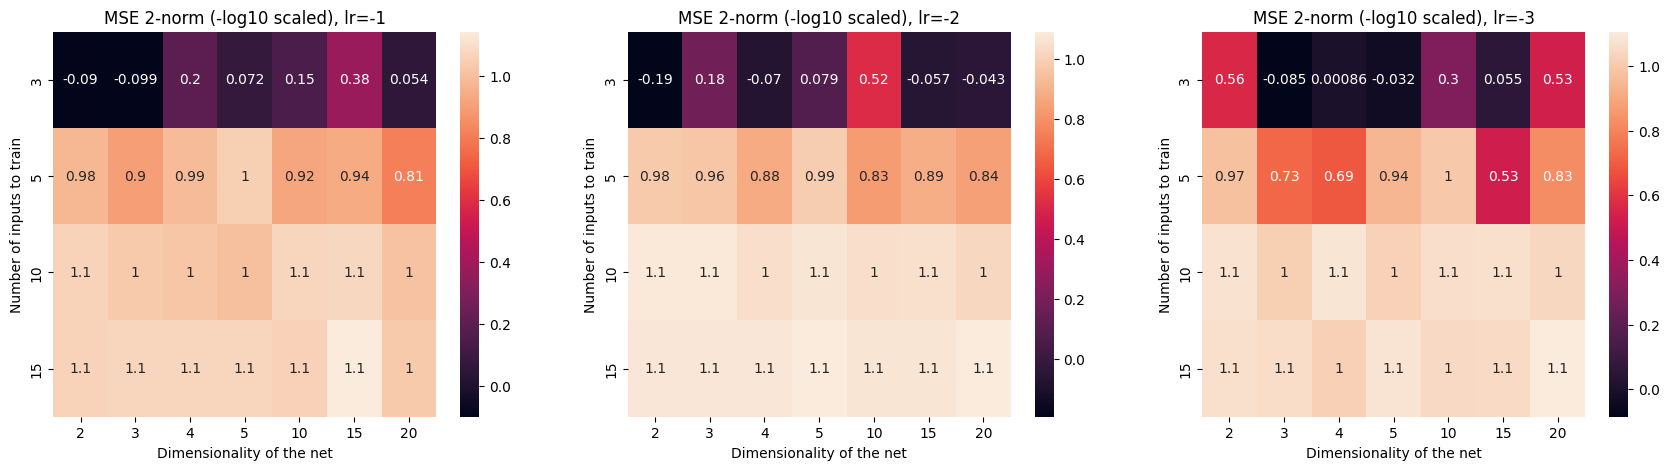

In [24]:
import seaborn
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (21, 5))
for ax_index in range(len(axes)):
    axes[ax_index].set_title(f'MSE 2-norm (-log10 scaled), lr={-(ax_index+1)}')

# x axis: dimension
# y axis: number of inputs

for idx in range(len(learning_rates)):
    input_data_sigmoid = -np.log10(results[idx]).reshape(len(n_inputs), len(dimensions))
    s = seaborn.heatmap(data = input_data_sigmoid, annot = input_data_sigmoid, 
                ax = axes[idx], xticklabels = dimensions, yticklabels = n_inputs)
    s.set(ylabel='Number of inputs to train', xlabel='Dimensionality of the net')